# Task 1.1

## Building distribution

In [2]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /home/genom10/.local/lib/python3.8/site-packages (0.12.2)


In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
from numpy.random import normal

A = pd.DataFrame(normal(1, 1, 1000), columns=['value'])
B = pd.DataFrame(normal(10, 4, 2000), columns=['value'])
A['source'] = 0
B['source'] = 1
twoModal = pd.concat((A, B))
# print(twoModal)

<AxesSubplot: xlabel='value', ylabel='Count'>

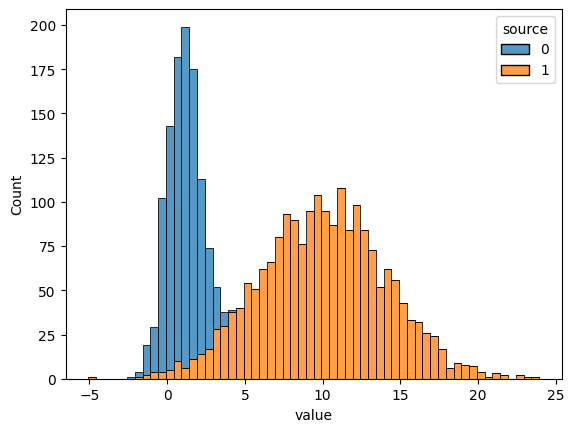

In [4]:
sns.histplot(data=twoModal, x='value', hue='source', multiple="stack", binwidth=0.5)

## Taking samples and plotting their means 

<AxesSubplot: xlabel='value', ylabel='Count'>

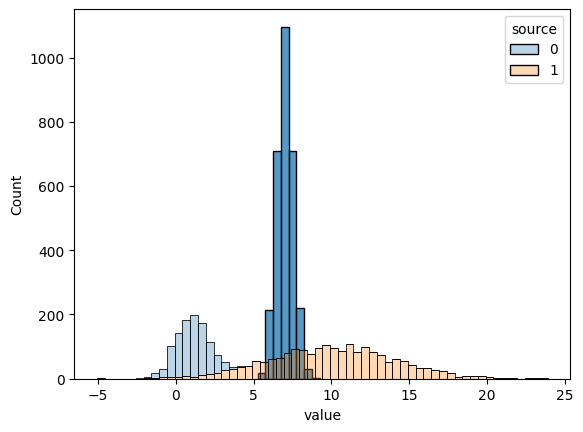

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()    

means = pd.DataFrame([twoModal.sample(100).mean() for i in range (3000)])
sns.histplot(data=means, x='value', binwidth=0.5, ax=ax)
sns.histplot(data=twoModal, x='value', hue='source', multiple="stack", binwidth=0.5, ax=ax, alpha=0.3)

# Task 1.2

Let's load a new dataset instead of generating a new one.

In [7]:
data = sns.load_dataset('tips')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


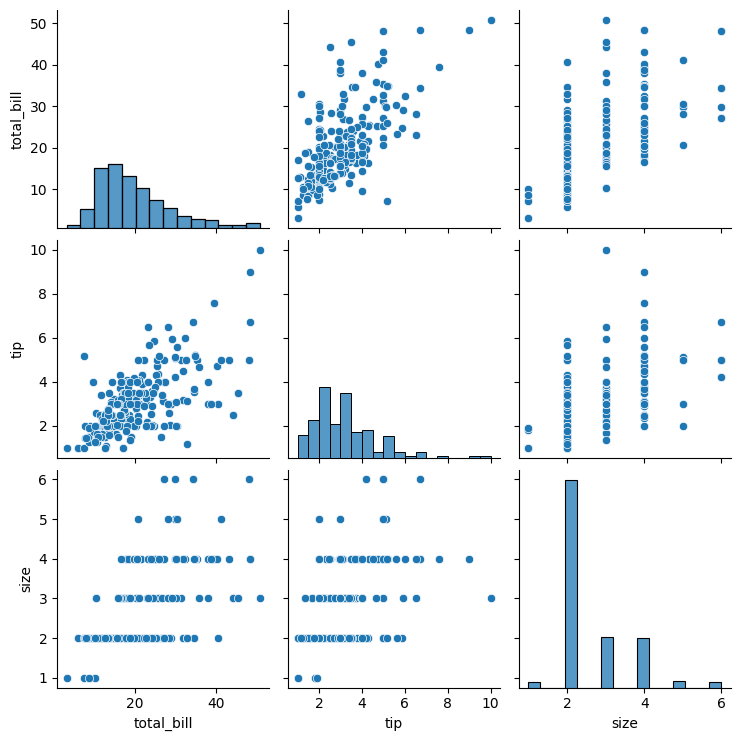

In [10]:
sns.pairplot(data)


We see obvious correlation in `total_bill` and `tip`. Let's make a regression analysis of them.

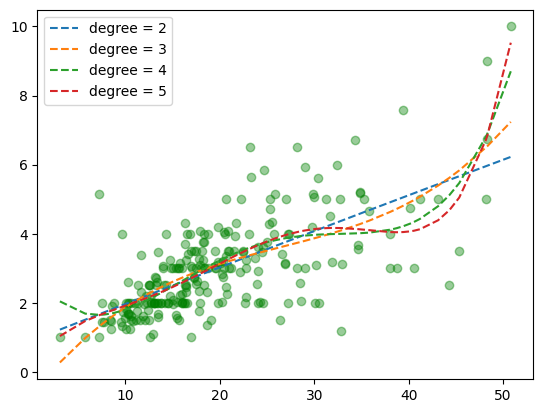

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = data['total_bill'].values.reshape(-1, 1)
Y = data['tip'].values.reshape(-1, 1)

def plotPolyLinReg(ax, X, Y, degree=2):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    polyReg = LinearRegression()

    features = poly.fit_transform(X)
    polyReg.fit(features, Y)

    test_features = poly.fit_transform(sorted(X))
    ax.plot(sorted(X), polyReg.predict(test_features), '--', label=f'degree = {degree}')

plt.scatter(X, Y, color='g', alpha=0.4)
plotPolyLinReg(plt, X, Y, 2)
plotPolyLinReg(plt, X, Y, 3)
plotPolyLinReg(plt, X, Y, 4)
plotPolyLinReg(plt, X, Y, 5)
plt.legend()